In [21]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import re
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

import cptac
import cptac.algorithms as al

ov = cptac.Ovarian()
co = cptac.Colon()

In [7]:
Trans_Results = pd.read_csv("Formatted_Trans_Results.csv")

In [10]:
Colon = Trans_Results.loc[Trans_Results['Cancer_Type'] == 'Colon']
MUC5B_Colon = Colon.loc[Colon['Mutation_Gene'] == 'MUC5B']

In [12]:
MUC5B_Colon_Prot = MUC5B_Colon.loc[MUC5B_Colon['Omics'] == 'proteomics']
MUC5B_Colon_Trans = MUC5B_Colon.loc[MUC5B_Colon['Omics'] == 'transcriptomics']

In [15]:
print(len(MUC5B_Colon_Prot))

MUC5B_Colon_Prot

38


,Cancer_Type,Mutation_Gene,Protein,Site,Omics,Interacting_Protein,P_Value
617,Colon,MUC5B,PCK2,NaN,proteomics,True,1.136850e-05
618,Colon,MUC5B,MRE11,NaN,proteomics,False,1.144045e-10
619,Colon,MUC5B,GPX2,NaN,proteomics,False,5.988006e-10
620,Colon,MUC5B,ANP32E,NaN,proteomics,False,3.042503e-09
621,Colon,MUC5B,KRT20,NaN,proteomics,False,3.969811e-09
622,Colon,MUC5B,RAD50,NaN,proteomics,False,9.817991e-09
623,Colon,MUC5B,PRDX5,NaN,proteomics,False,5.077905e-08
624,Colon,MUC5B,ARHGEF2,NaN,proteomics,False,7.919124e-08
625,Colon,MUC5B,NFKB2,NaN,proteomics,False,1.471187e-07
626,Colon,MUC5B,MRPS31,NaN,proteomics,False,3.790579e-07


In [16]:
print(len(MUC5B_Colon_Trans))
MUC5B_Colon_Trans

82


,Cancer_Type,Mutation_Gene,Protein,Site,Omics,Interacting_Protein,P_Value
655,Colon,MUC5B,MUC20,NaN,transcriptomics,True,4.319530e-06
656,Colon,MUC5B,FRMD1,NaN,transcriptomics,True,1.340157e-05
657,Colon,MUC5B,ST6GAL1,NaN,transcriptomics,True,6.725471e-05
658,Colon,MUC5B,MUC12,NaN,transcriptomics,True,1.108167e-04
659,Colon,MUC5B,ST6GALNAC2,NaN,transcriptomics,True,6.152779e-04
661,Colon,MUC5B,GPX2,NaN,transcriptomics,False,1.758001e-10
662,Colon,MUC5B,POU5F1B,NaN,transcriptomics,False,4.688794e-10
663,Colon,MUC5B,RUBCNL,NaN,transcriptomics,False,1.541604e-09
664,Colon,MUC5B,ATP10B,NaN,transcriptomics,False,3.068562e-09
665,Colon,MUC5B,NUBPL,NaN,transcriptomics,False,3.884908e-09


In [17]:
prots_MUC5B_Colon = list(MUC5B_Colon_Prot['Protein'])
rna_MUC5B_Colon = list(MUC5B_Colon_Trans['Protein'])

In [18]:
#List proteins in both 
for pro in prots_MUC5B_Colon:
    if pro in rna_MUC5B_Colon:
        print(pro)

MRE11
GPX2
ANP32E
KRT20
NUBPL
ACE2
PLA2G4A
VAPB


When MUC5B is mutated in colon cancer, 82 transcripts are significantly altered, yet only 38 proteomics

In [48]:
GPX2_trans_df = co.join_omics_to_mutations(mutations_genes='MUC5B', omics_df_name='transcriptomics', omics_genes='GPX2')
GPX2_prot_df = co.join_omics_to_mutations(mutations_genes='MUC5B', omics_df_name='proteomics', omics_genes='GPX2')

for ind, row in GPX2_trans_df.iterrows():
    if row['MUC5B_Mutation_Status'] == 'Wildtype_Tumor':
        GPX2_trans_df.loc[ind, 'Mutated'] = 'No'
    else:
        GPX2_trans_df.loc[ind, 'Mutated'] = 'Yes'
        

GPX2_trans_df['GPX2_proteomics'] = GPX2_prot_df['GPX2_proteomics']
    

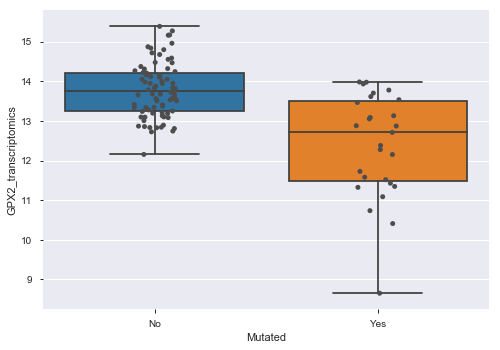

In [49]:
plt = sns.boxplot(data = GPX2_trans_df, y='GPX2_transcriptomics', x='Mutated')
plt = sns.stripplot(data = GPX2_trans_df, y='GPX2_transcriptomics', x='Mutated', color = '.3')

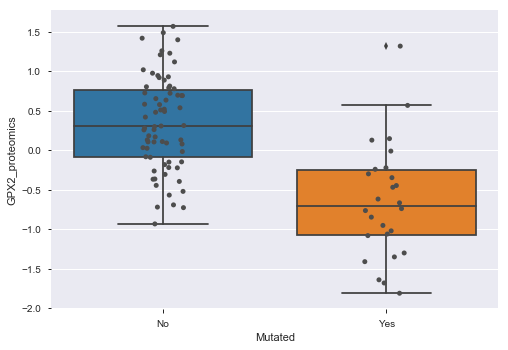

In [50]:
plt = sns.boxplot(data = GPX2_trans_df, y='GPX2_proteomics', x='Mutated')
plt = sns.stripplot(data = GPX2_trans_df, y='GPX2_proteomics', x='Mutated', color = '.3')

In [44]:
GPX2_trans_df

,GPX2_transcriptomics,MUC5B_Mutation,MUC5B_Location,MUC5B_Mutation_Status,Sample_Status,Mutated,GPX2_proteomics
Sample_ID,,,,,,,
S001,14.3184,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,No,NaN
S002,14.2429,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,No,0.3010
S003,12.1536,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,No,-0.6910
S004,13.6463,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,No,0.8050
S005,14.5832,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,No,1.2300
S006,13.0858,"[nonsynonymous SNV, nonsynonymous SNV]","[T2002M, V3918A]",Multiple_mutation,Tumor,Yes,-0.4680
S007,14.6741,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,No,0.6550
S008,14.1952,[Wildtype_Tumor],[No_mutation],Wildtype_Tumor,Tumor,No,0.5210
S009,11.4273,[nonsynonymous SNV],[V494I],Single_mutation,Tumor,Yes,-0.9510
